# Naïve bayes:
- probabilistic approach
- classification algorithm.
- unsophisticated --->naïve
- bayes therom-->conditional probability
- Independent events:P(a and b)P(a)*P(b)
- Mutually exclusive:P(A and B)=0
- conditional probability:  P(A|B)=P(A and B)/P(B)


# bayes therom:
P(A|B)=P(A)*P(B|A)/P(B)


# 1. dataset:
f1  f2  f3 f4  target
                True
                False
                True
                False
                
X-->feature vector-->[f1,f2,f3,f4]
target-->[True,False]
P(True|f1,f2,f3,f3)=0.6
P(False|f1,f2,f3,f4)=0.4
class:True

# conditional independence: 
P(True|f1,f2,f3,f3)
=P(True|f1)*P(True)*P(True|f2)---------/P(f1,f2,f3,f4)
P(False|f1,f2,f3,f4)=----/P(f1,f2,f3,f4)
denominator--->conatnt
p(True|X)=0.6
P(False|x)=0.4
becoz the denominator will not affect the the entire result.

# 2. dataset:
year   gender  subject   result
                         pass/fail

P(result|year,gender,subject)

P(pass|year,gender,subject)=

P(pass)*P(year|pass)*P(gender|pass)*P(subject|pass)

P(Fail|year,gender,subject)=
P(Fail)*P(year|Fail)*P(gender|Fail)*P(subject|Fail)

P(Pass|year,gender,subject)=0.6
P(Fail|year,gender,subject)=0.4

result is pass-->it is having the highest probability value

# variations of Naïve bayes:
1.Bernaullis Naïve bayes
2.multinomial Naïve bayes
3.Gaussian Naïve bayes

# 1.Bernaullis Naïve bayes:
-suppose the features(independent variables are following the bernaulli distribution then we will use Bernaullis Naïve bayes
f1   f2   f3   f4    target
T/F  Y/F  M/F  P/F
                      
# 2.Multinomial Naïve bayes:
NLP:
whenever we have a features with the text data---then we will use the 
Multinomial Naïve bayes
text-->vector
ex:
spam classifier:

email_text      spam/Ham

# 3.Gaussian Naïve bayes:
when the features(independent variables)
follows the gaussian distribution.then we will use the guassian naïve bayes.
Iris data: SL,SW,PL,PW
continuous data--->Gaussian naïve bayes.

f1 f2 f3 f4  target

1.out of 4--->3 continuous--->GNB
2 categorical|2 numerical--->choice
                      
                      
# to build amodel by using navie bayes theorem
# steps                      
- x,y:
- from sklearn.naive_bayes import GaussianNB
- gnb=GaussianNB()
- gnb.fit(xtrain,xtest)
- ypred=gnb.predict(xtest)
- from sklearn.metrics import accuracy_score,classification_report,confusion _matrix
- accuracy_score(ypred,ytest)
- classification_report(ypred,ytest)
- confusion_matrix(ypred,ytest)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv('iris.csv')

In [4]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
x = df.drop('species',axis = 1)
y = df['species']

In [7]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [10]:
from sklearn.naive_bayes import GaussianNB

In [11]:
model = GaussianNB()

In [12]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [13]:
model.fit(x_train, y_train) 

GaussianNB()

In [14]:
y_pred = model.predict(x_test) 

In [15]:
y_pred

array(['virginica', 'virginica', 'setosa', 'virginica', 'virginica',
       'setosa', 'setosa', 'versicolor', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'virginica', 'virginica', 'setosa',
       'virginica', 'versicolor', 'virginica', 'setosa', 'virginica',
       'setosa', 'setosa', 'setosa', 'virginica', 'setosa'], dtype='<U10')

In [17]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

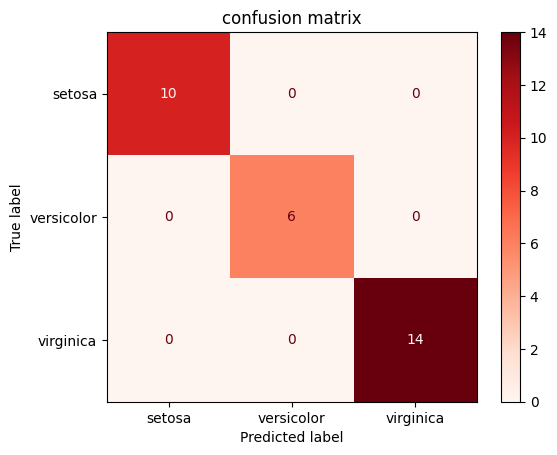

In [18]:
cnn = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cnn, display_labels=df['species'].unique())
disp.plot(cmap='Reds')
plt.title('confusion matrix')
plt.show()

In [22]:
print(" Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))
print("\n Accuracy Score:", accuracy_score(y_test, y_pred))

 Confusion Matrix:
 [[10  0  0]
 [ 0  6  0]
 [ 0  0 14]]

 Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         6
   virginica       1.00      1.00      1.00        14

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


 Accuracy Score: 1.0


In [52]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# wine quality dataset

In [81]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [83]:
# Load dataset
df = pd.read_csv('winequality-red.csv')  # or 'winequality-white.csv'



In [84]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,6
2,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,7
3,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,8
4,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,9


In [85]:
# Check for null values
print(df.isnull().sum())

# Features and target
X = df.drop('quality', axis=1)
y = df['quality']

# Optional: Convert to binary classification (e.g., quality >= 6 is good)
y = y.apply(lambda value: 1 if value >= 6 else 0)

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [86]:
# Initialize Gaussian Naive Bayes
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)


GaussianNB()

Accuracy Score: 0.734375
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.48      0.58       121
           1       0.74      0.89      0.81       199

    accuracy                           0.73       320
   macro avg       0.73      0.68      0.69       320
weighted avg       0.73      0.73      0.72       320



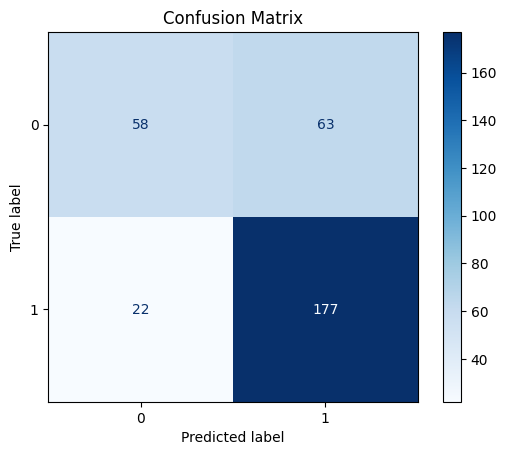

In [87]:
# Predict on test data
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


# Heart Disease Dataset

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
df = pd.read_csv('heart.csv')

In [112]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [113]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [114]:
# check for null values
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [115]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [117]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [118]:
df['HeartDisease'].unique()

array([0, 1])

In [119]:
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [120]:
from sklearn.preprocessing  import LabelEncoder

In [121]:
# Encode categorical columns
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [122]:
# Features and target
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]


In [123]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [126]:
# Initialize Gaussian Naive Bayes
model = GaussianNB()

In [127]:
# Train the model
model.fit(X_train, y_train)


GaussianNB()

In [128]:
# Predict on test data
y_pred = model.predict(X_test)

In [129]:
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1])

In [130]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [131]:
# Accuracy
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Accuracy Score: 0.842391304347826


In [132]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.82        77
           1       0.88      0.84      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



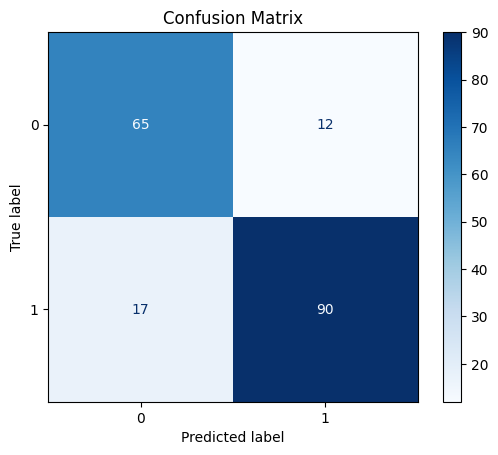

In [133]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [134]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Manually defined values from confusion matrix
# Confusion Matrix:
# [[65, 12],
#  [17, 90]]

y_true = [0]*65 + [0]*12 + [1]*17 + [1]*90  # actual values
y_pred = [0]*65 + [1]*12 + [0]*17 + [1]*90  # predicted values

# Accuracy
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", round(accuracy*100, 2), "%")

# Precision
precision = precision_score(y_true, y_pred)
print("Precision:", round(precision*100, 2), "%")

# Recall
recall = recall_score(y_true, y_pred)
print("Recall:", round(recall*100, 2), "%")

# F1-Score
f1 = f1_score(y_true, y_pred)
print("F1 Score:", round(f1*100, 2), "%")

# Classification Report
print("\nClassification Report:\n", classification_report(y_true, y_pred))


Accuracy: 84.24 %
Precision: 88.24 %
Recall: 84.11 %
F1 Score: 86.12 %

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.82        77
           1       0.88      0.84      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184

